In [47]:
import vcf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### WHat samples can we use? -> Intersection between vcf, chol and confounder data ###
confounder=pd.read_csv("../Clinical_Data/AETIO_DIGPD_clinical_final.csv")
con_ids=confounder["AETID"].tolist()
print(len(con_ids))
#
vcf_reader = vcf.Reader(filename='../Aetionomy/AETIO_CS_postimpvcf.gz')
vcf_ids = list(vcf_reader.samples) #not consistent with cholesterol ids!!
print (len(vcf_ids))
#
chol=pd.read_csv("../Aetionomy/cholesterolData_AETIONOMYPD.tsv", sep="\t")
chol_ids=chol.index.values.tolist()
print (len(chol_ids))

790
350
135


In [4]:
ids_intersections = [x for x in chol_ids if x in vcf_ids and x in con_ids] # the ids we're using
len(ids_intersections) #106

106

In [ ]:
################## OUTCOMES #######################

In [82]:
#load cholesterol data
dfs = pd.read_csv("../Aetionomy/cholesterolData_AETIONOMYPD.tsv", sep="\t")
print (dfs.isnull().values.any()) # no missing values

False


Index(['AET0069', 'AET0044', 'AET0380', 'AET0027', 'AET0392', 'AET0049',
       'AET0006', 'AET0065', 'AET0378', 'AET0374',
       ...
       'AET0093', 'AET0396', 'AET0384', 'AET0021', 'AET0071', 'AET0395',
       'AET0410', 'AET0138', 'AET0111', 'AET0390'],
      dtype='object', length=135)

In [86]:
#keep only relevant ids from intersection!
dfs=dfs.filter(items=ids_intersections,axis=0)
len(dfs)

106

In [87]:
#rename awkward column names
dfs.columns=["24OH ng/ml","25OH ng/ml","27OH ng/ml","4ß ng/ml","7Keto ng/ml","7aOH ng/ml","7ß ng/ml","Brassicasterol µg/dl","Campestanol µg/dl","Campesterol mg/dl","Cholestanol mg/dl","Cholesterol GC mg/dl","Desmosterol mg/dl","DihydroLanesterol µg/dl","Lanesterol µg/dl","Lathosterol mg/dl","Series ID","Sitostanol µg/dl","Sitosterol mg/dl","Stigmasterol µg/dl"]
#drop series ID column
dfs=dfs.drop(["Series ID"],axis=1)

In [88]:
#column list
columns=dfs.columns.tolist()

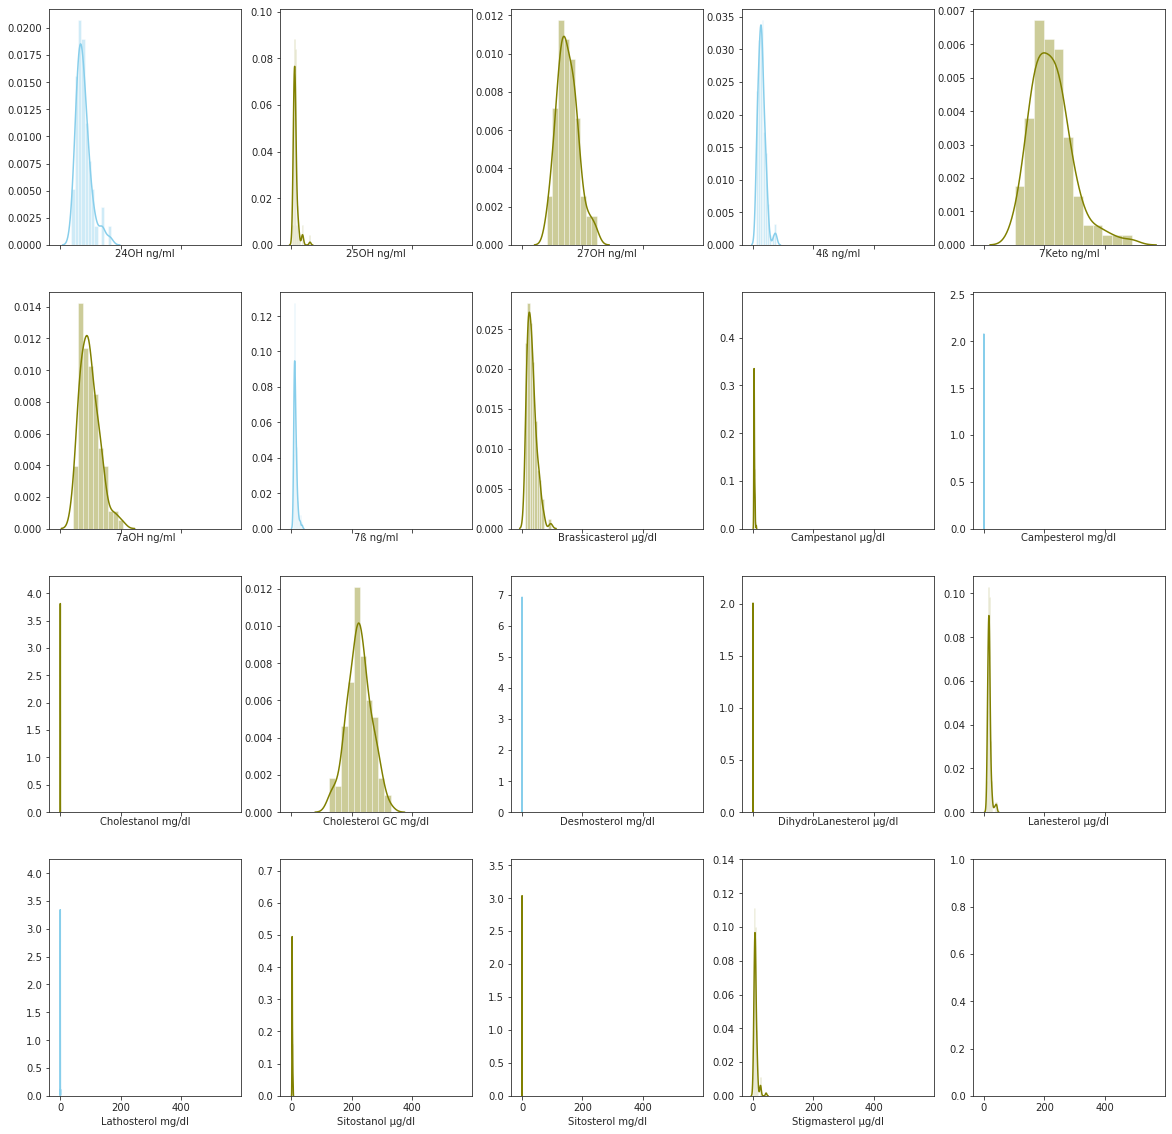

In [89]:
#plotting distplots
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(4,5,figsize=(20, 20), sharex=True)
sns.distplot(dfs[columns[0]] , color="skyblue",ax=axes[0, 0])
sns.distplot(dfs[columns[1]] , color="olive",ax=axes[0, 1])
sns.distplot(dfs[columns[2]] , color="olive",ax=axes[0, 2])
sns.distplot(dfs[columns[3]] , color="skyblue",ax=axes[0,3])
sns.distplot(dfs[columns[4]] , color="olive",ax=axes[0,4])
sns.distplot(dfs[columns[5]] , color="olive",ax=axes[1,0])
sns.distplot(dfs[columns[6]] , color="skyblue",ax=axes[1,1])
sns.distplot(dfs[columns[7]] , color="olive",ax=axes[1,2])
sns.distplot(dfs[columns[8]] , color="olive",ax=axes[1,3])
sns.distplot(dfs[columns[9]] , color="skyblue",ax=axes[1,4])
sns.distplot(dfs[columns[10]] , color="olive",ax=axes[2,0])
sns.distplot(dfs[columns[11]] , color="olive",ax=axes[2,1])
sns.distplot(dfs[columns[12]],color="skyblue",ax=axes[2,2])
sns.distplot(dfs[columns[13]],color="olive",ax=axes[2,3])
sns.distplot(dfs[columns[14]],color="olive",ax=axes[2,4])
sns.distplot(dfs[columns[15]],color="skyblue",ax=axes[3,0])
sns.distplot(dfs[columns[16]],color="olive",ax=axes[3,1])
sns.distplot(dfs[columns[17]],color="olive",ax=axes[3,2])
sns.distplot(dfs[columns[18]],color="olive",ax=axes[3,3])

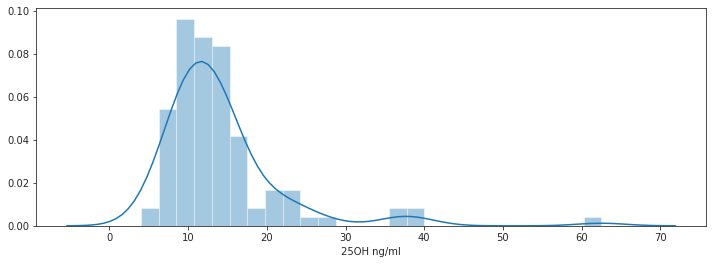

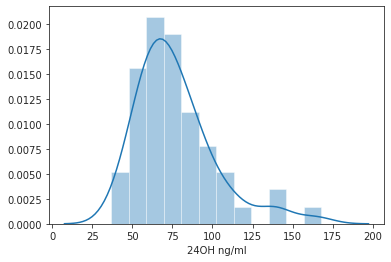

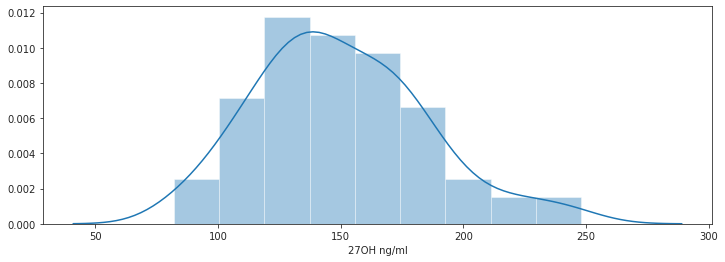

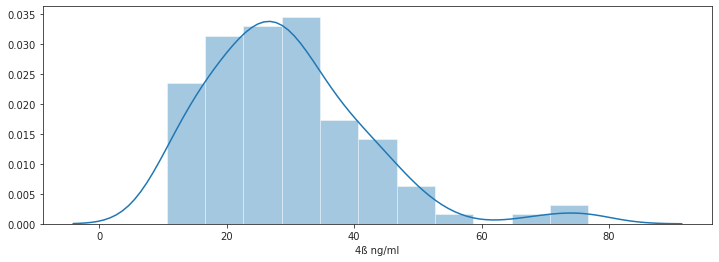

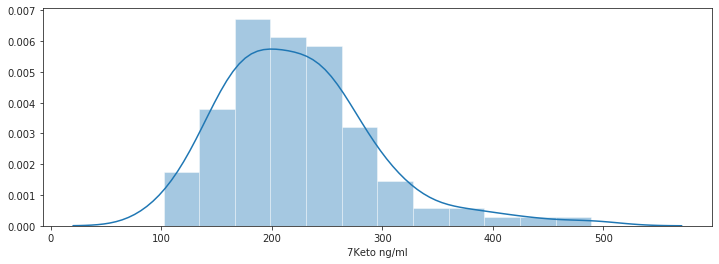

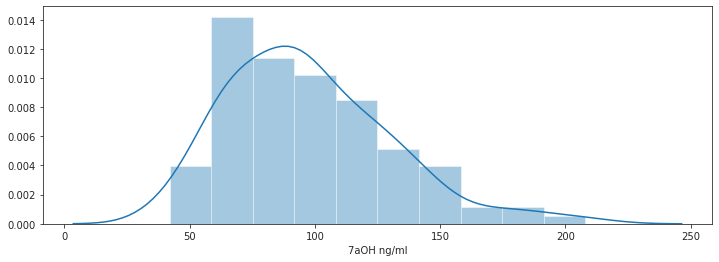

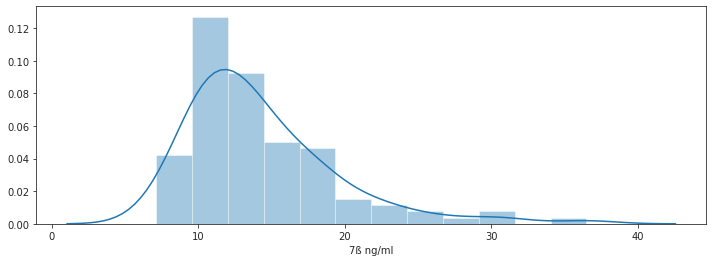

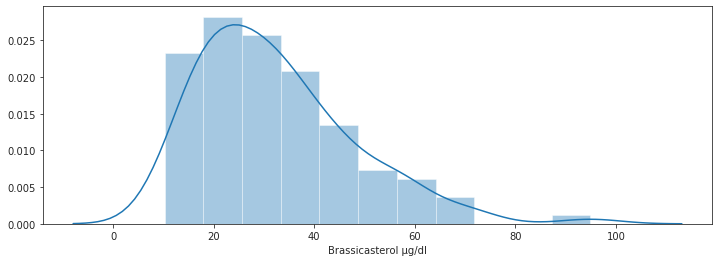

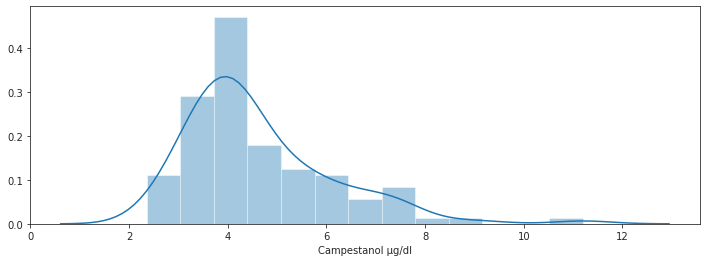

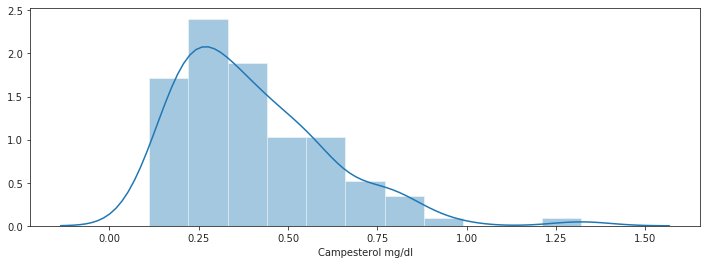

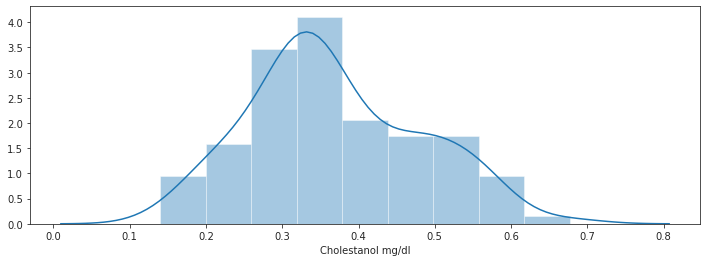

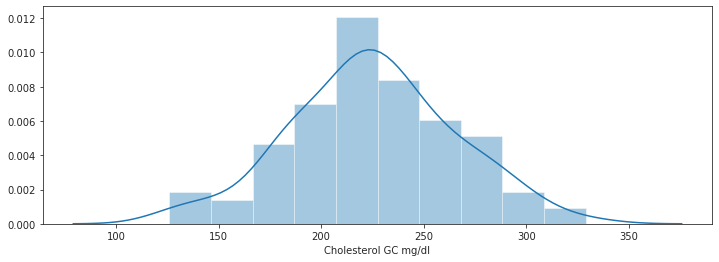

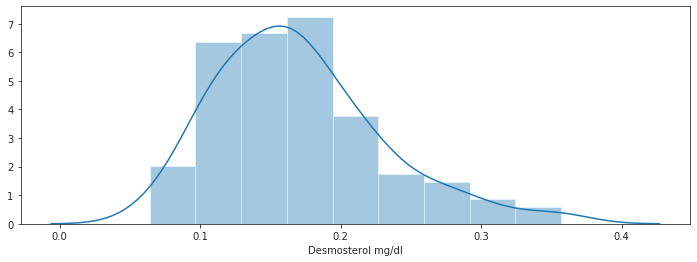

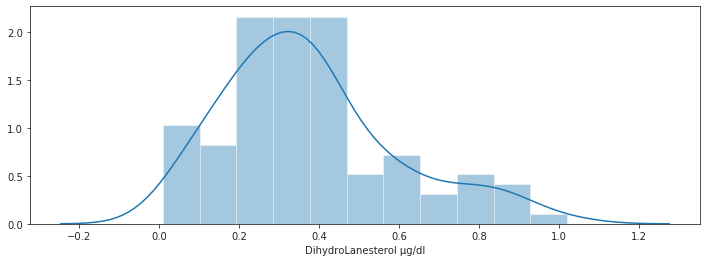

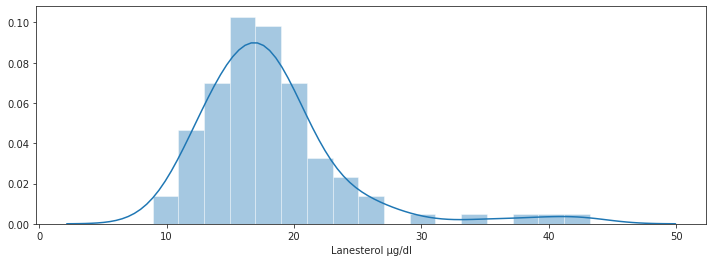

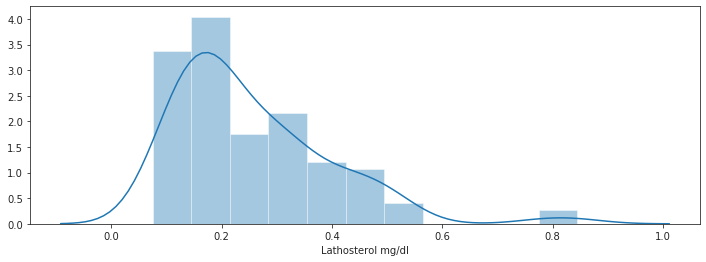

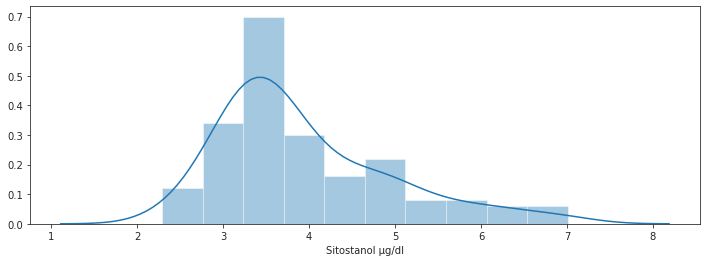

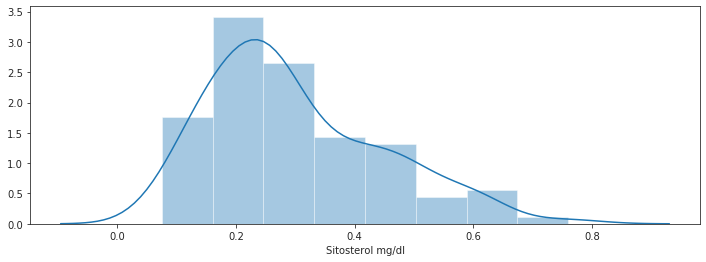

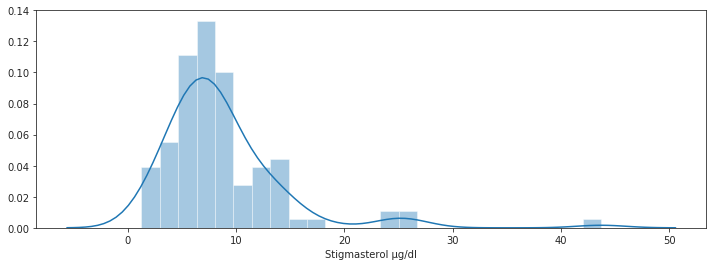

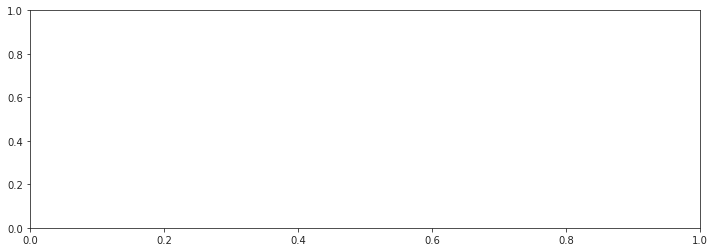

In [90]:
#check out distributions peu a peu
sns.set_style("ticks")
for i in range(len(columns)):
    fig,ax = plt.subplots(figsize=(12,4))
    plt.figure(i)
    sns.distplot(dfs[columns[i]])

Little Summary:

- Values more or less normal distributed
- Heavy variabilty in value ranges (see describe), std deviation

In [91]:
dfs.describe()

,24OH ng/ml,25OH ng/ml,27OH ng/ml,4ß ng/ml,7Keto ng/ml,7aOH ng/ml,7ß ng/ml,Brassicasterol µg/dl,Campestanol µg/dl,Campesterol mg/dl,Cholestanol mg/dl,Cholesterol GC mg/dl,Desmosterol mg/dl,DihydroLanesterol µg/dl,Lanesterol µg/dl,Lathosterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.00000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,76.896226,14.245943,150.056604,29.147170,223.669811,97.292453,14.272170,32.340566,4.61566,0.399217,0.368991,224.867925,0.170179,0.376547,18.156604,0.255057,3.940943,0.299604,8.725566
std,25.068641,8.035715,34.843003,12.527138,69.696037,32.766117,5.179253,15.515607,1.48711,0.210601,0.111134,39.903234,0.059694,0.217700,5.728658,0.141780,1.004485,0.145296,5.861418
min,37.000000,4.010000,82.000000,10.600000,102.000000,42.000000,7.110000,10.300000,2.36000,0.111000,0.140000,126.000000,0.064000,0.010000,8.900000,0.075000,2.290000,0.075000,1.250000
25%,60.500000,9.852500,127.250000,20.900000,174.000000,72.000000,10.625000,21.225000,3.65000,0.239000,0.305250,200.250000,0.127000,0.227000,14.625000,0.148000,3.262500,0.185750,5.650000
50%,72.500000,12.500000,148.000000,27.450000,215.500000,92.500000,13.150000,28.800000,4.21500,0.350000,0.347000,224.500000,0.162000,0.357000,17.050000,0.211500,3.640000,0.261500,7.460000
75%,87.500000,15.350000,171.750000,35.275000,255.000000,115.500000,16.700000,40.925000,5.32750,0.518500,0.458750,249.750000,0.204750,0.451500,19.600000,0.320250,4.482500,0.404750,9.760000
max,168.000000,62.500000,248.000000,76.700000,489.000000,208.000000,36.500000,94.900000,11.20000,1.320000,0.677000,329.000000,0.357000,1.020000,43.200000,0.845000,7.010000,0.760000,43.700000


In [92]:
#export dataframe
dfs.to_csv("cholesterole_raw.csv",index=False)

In [93]:
#### Holgers Advise: Normalizing by column sum for 24OH CHolesterol, 7aOH Cholesterol and 27OH Cholesterol

In [94]:
#deep copy of original dataframe
import copy
dfs_norm=copy.deepcopy(dfs)

In [95]:
#normalizing each column separately
dfs_norm["24OH ng/ml"]=dfs_norm["24OH ng/ml"]/dfs_norm["24OH ng/ml"].sum()

In [96]:
dfs_norm["7aOH ng/ml"]=dfs_norm["7aOH ng/ml"]/dfs_norm["7aOH ng/ml"].sum()

In [97]:
dfs_norm["27OH ng/ml"]=dfs_norm["27OH ng/ml"]/dfs_norm["27OH ng/ml"].sum()

In [98]:
dfs_norm.describe()

,24OH ng/ml,25OH ng/ml,27OH ng/ml,4ß ng/ml,7Keto ng/ml,7aOH ng/ml,7ß ng/ml,Brassicasterol µg/dl,Campestanol µg/dl,Campesterol mg/dl,Cholestanol mg/dl,Cholesterol GC mg/dl,Desmosterol mg/dl,DihydroLanesterol µg/dl,Lanesterol µg/dl,Lathosterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.00000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.009434,14.245943,0.009434,29.147170,223.669811,0.009434,14.272170,32.340566,4.61566,0.399217,0.368991,224.867925,0.170179,0.376547,18.156604,0.255057,3.940943,0.299604,8.725566
std,0.003076,8.035715,0.002191,12.527138,69.696037,0.003177,5.179253,15.515607,1.48711,0.210601,0.111134,39.903234,0.059694,0.217700,5.728658,0.141780,1.004485,0.145296,5.861418
min,0.004539,4.010000,0.005155,10.600000,102.000000,0.004073,7.110000,10.300000,2.36000,0.111000,0.140000,126.000000,0.064000,0.010000,8.900000,0.075000,2.290000,0.075000,1.250000
25%,0.007422,9.852500,0.008000,20.900000,174.000000,0.006981,10.625000,21.225000,3.65000,0.239000,0.305250,200.250000,0.127000,0.227000,14.625000,0.148000,3.262500,0.185750,5.650000
50%,0.008895,12.500000,0.009305,27.450000,215.500000,0.008969,13.150000,28.800000,4.21500,0.350000,0.347000,224.500000,0.162000,0.357000,17.050000,0.211500,3.640000,0.261500,7.460000
75%,0.010735,15.350000,0.010798,35.275000,255.000000,0.011199,16.700000,40.925000,5.32750,0.518500,0.458750,249.750000,0.204750,0.451500,19.600000,0.320250,4.482500,0.404750,9.760000
max,0.020611,62.500000,0.015592,76.700000,489.000000,0.020169,36.500000,94.900000,11.20000,1.320000,0.677000,329.000000,0.357000,1.020000,43.200000,0.845000,7.010000,0.760000,43.700000


In [161]:
#export dataframe
dfs_norm.to_csv("cholesterole_norm.csv",index=False)

In [40]:
############################## CLINICAL DATA ####################################

In [153]:
pd.options.display.max_rows
pd.set_option('display.max_rows',106)
pd.set_option('display.max_columns',40)

In [218]:
confounder=pd.read_csv("../Clinical_Data/AETIO_DIGPD_clinical_final.csv")
confounder=confounder.set_index("AETID",inplace=False) #make AETID index

In [219]:
# keep only intersection of vcf, chol and confounder
confounder=confounder.filter(items=ids_intersections,axis=0)
len(confounder)

106

In [220]:
#drop Cohort, group, DOB, date_of_visit, date_of_diag_pd
confounder=confounder.drop(["Cohort","DOB","date_of_visit","date_diag_pd"],axis=1)

In [221]:
#vizualization
#separation of features into categorical and numerical for further inspection
confounder_categorical=["Sex","Ethnicity","Smoking","ann_clusters","levodopa","Group"]
confounder_numercial=[x for x in confounder.columns.tolist() if x not in confounder_categorical]

/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


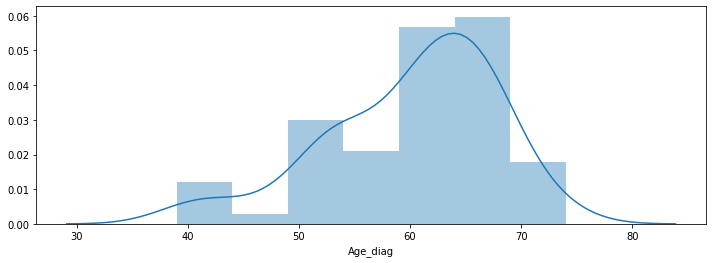

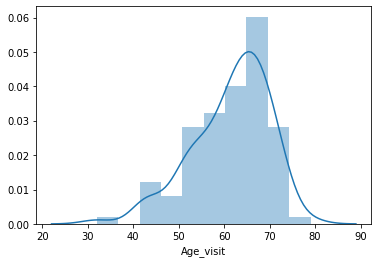

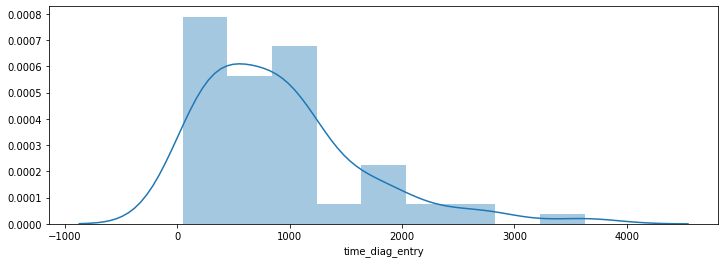

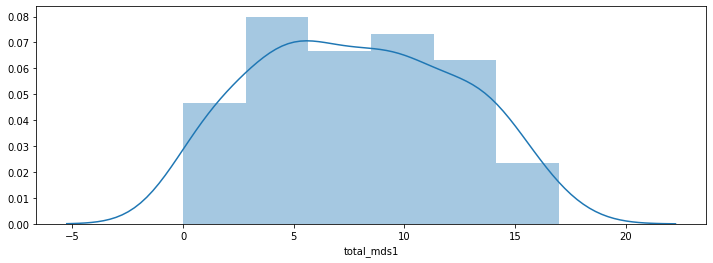

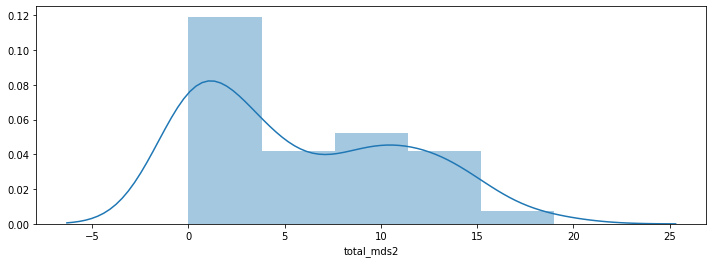

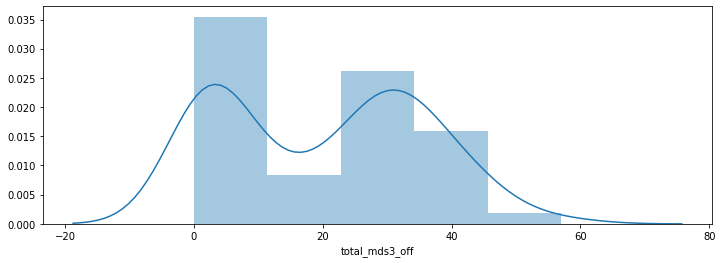

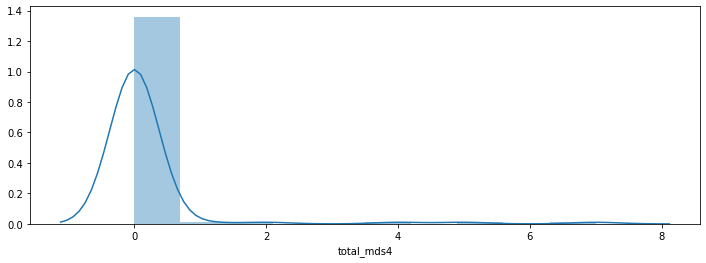

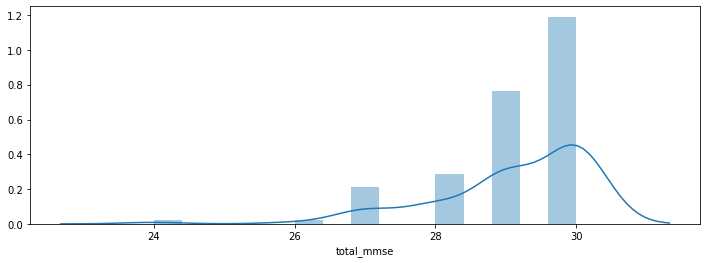

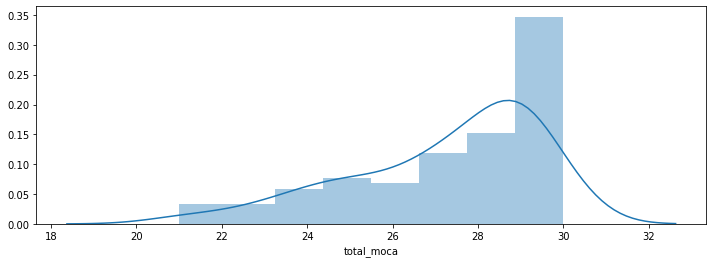

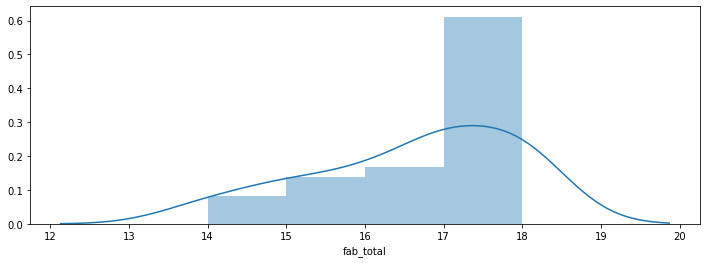

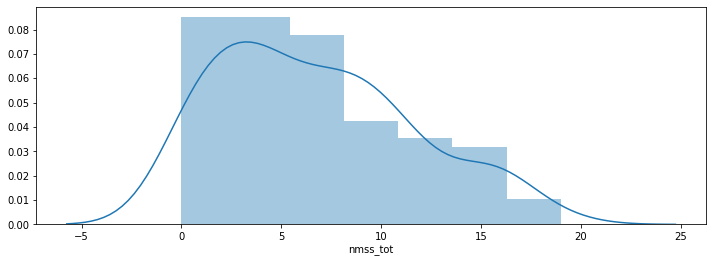

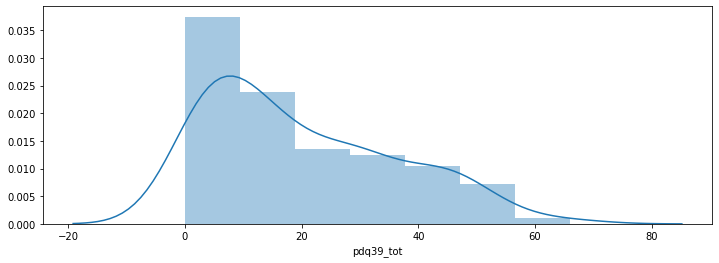

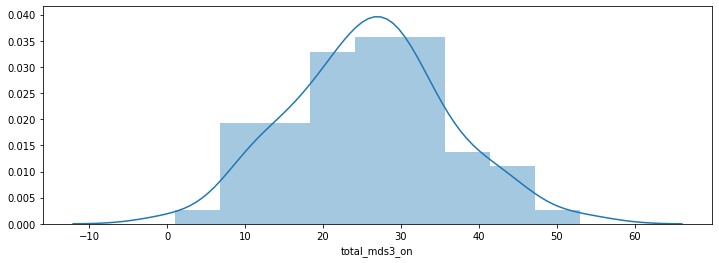

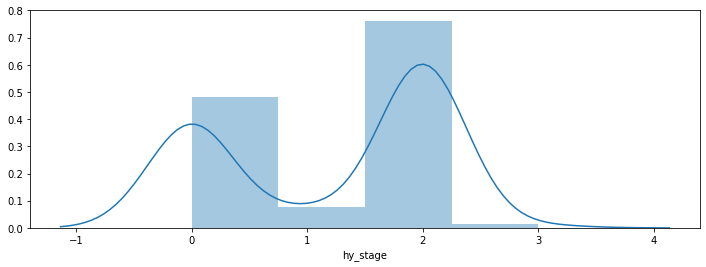

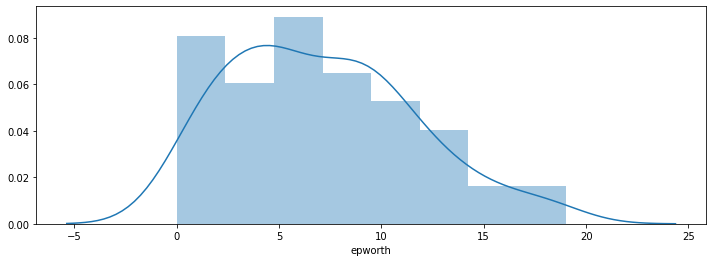

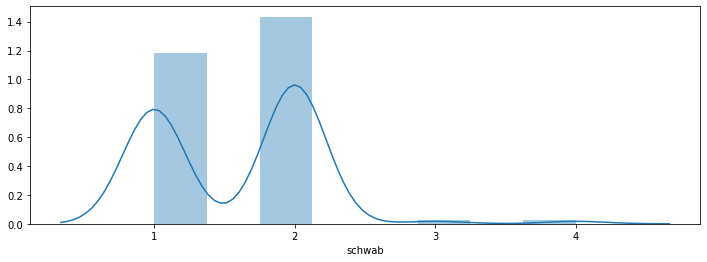

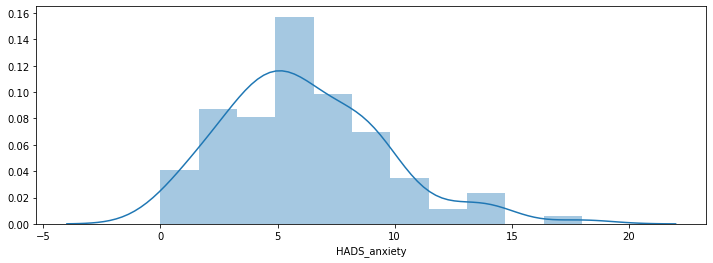

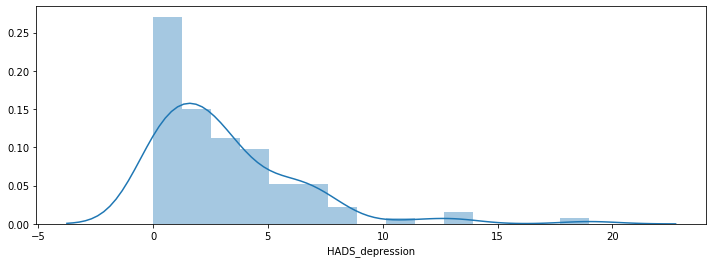

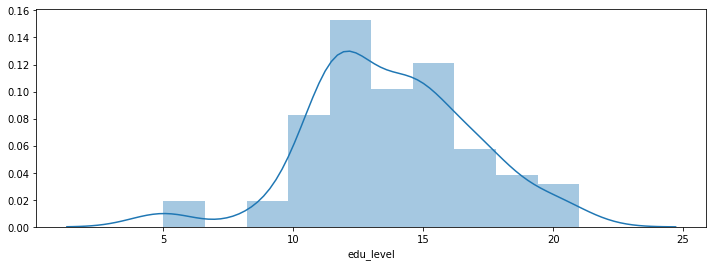

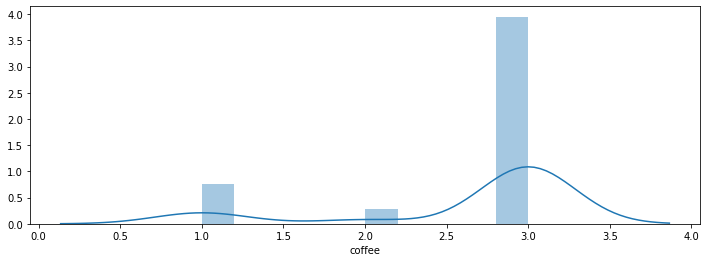

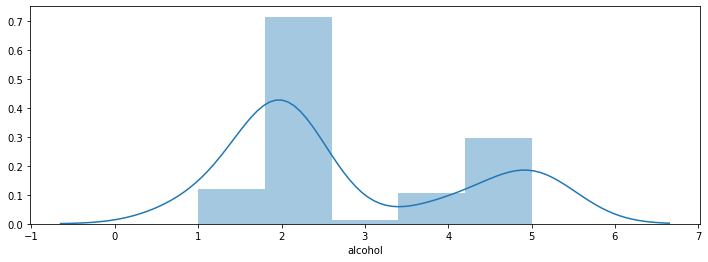

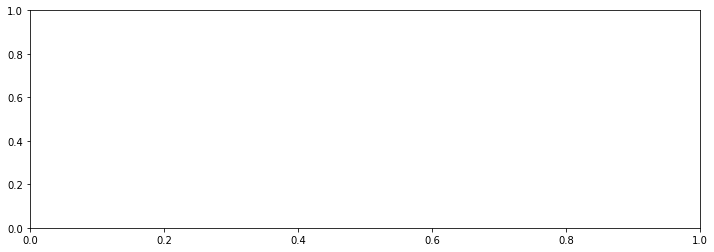

In [204]:
import seaborn as sns
#check out distributions of each numerical feature 

for i in range(len(confounder_numercial)):
    fig,ax = plt.subplots(figsize=(12,4))
    plt.figure(i)
    sns.distplot(confounder[confounder_numercial[i]])

In [51]:
# further inspection

Text(0.5, 1.0, 'edu_level')

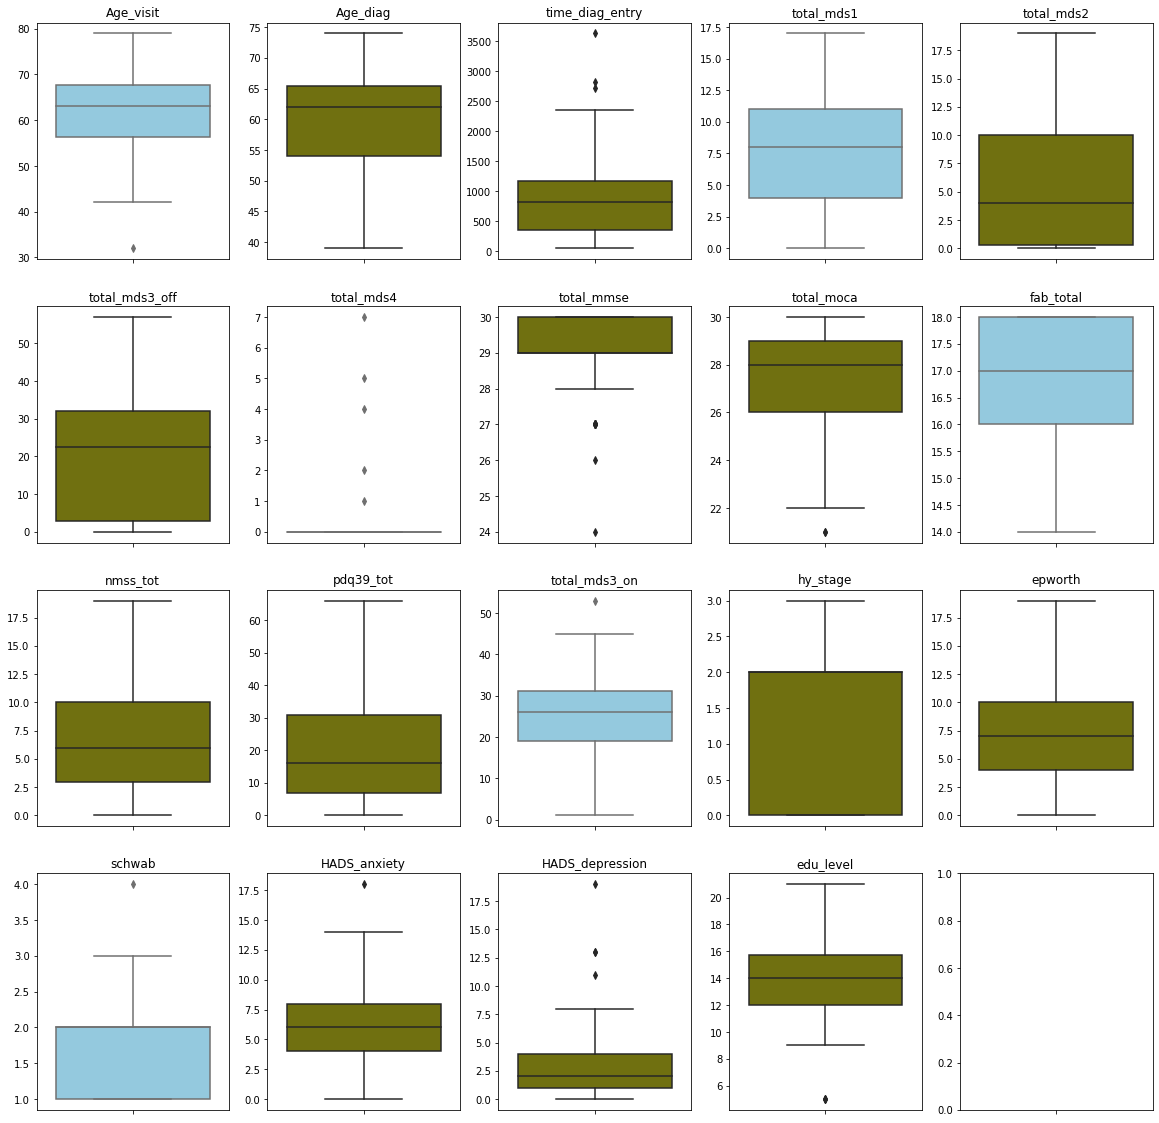

In [205]:
#boxplots of the numerical features
f, axes = plt.subplots(4,5,figsize=(20, 20), sharex=True)

sns.boxplot(y=confounder[[confounder_numercial[0]]],color="skyblue",ax=axes[0, 0]).set_title(confounder_numercial[0])
sns.boxplot(y=confounder[[confounder_numercial[1]]] , color="olive",ax=axes[0, 1]).set_title(confounder_numercial[1])
sns.boxplot(y=confounder[[confounder_numercial[2]]] , color="olive",ax=axes[0, 2]).set_title(confounder_numercial[2])
sns.boxplot(y=confounder[[confounder_numercial[3]]] , color="skyblue",ax=axes[0,3]).set_title(confounder_numercial[3])
sns.boxplot(y=confounder[[confounder_numercial[4]]] , color="olive",ax=axes[0,4]).set_title(confounder_numercial[4])
sns.boxplot(y=confounder[[confounder_numercial[5]]] , color="olive",ax=axes[1,0]).set_title(confounder_numercial[5])
sns.boxplot(y=confounder[[confounder_numercial[6]]] , color="skyblue",ax=axes[1,1]).set_title(confounder_numercial[6])
sns.boxplot(y=confounder[[confounder_numercial[7]]] , color="olive",ax=axes[1,2]).set_title(confounder_numercial[7])
sns.boxplot(y=confounder[[confounder_numercial[8]]] , color="olive",ax=axes[1,3]).set_title(confounder_numercial[8])
sns.boxplot(y=confounder[[confounder_numercial[9]]] , color="skyblue",ax=axes[1,4]).set_title(confounder_numercial[9])
sns.boxplot(y=confounder[[confounder_numercial[10]]] , color="olive",ax=axes[2,0]).set_title(confounder_numercial[10])
sns.boxplot(y=confounder[[confounder_numercial[11]]] , color="olive",ax=axes[2,1]).set_title(confounder_numercial[11])
sns.boxplot(y=confounder[[confounder_numercial[12]]],color="skyblue",ax=axes[2,2]).set_title(confounder_numercial[12])
sns.boxplot(y=confounder[[confounder_numercial[13]]],color="olive",ax=axes[2,3]).set_title(confounder_numercial[13])
sns.boxplot(y=confounder[[confounder_numercial[14]]],color="olive",ax=axes[2,4]).set_title(confounder_numercial[14])
sns.boxplot(y=confounder[[confounder_numercial[15]]],color="skyblue",ax=axes[3,0]).set_title(confounder_numercial[15])
sns.boxplot(y=confounder[[confounder_numercial[16]]],color="olive",ax=axes[3,1]).set_title(confounder_numercial[16])
sns.boxplot(y=confounder[[confounder_numercial[17]]],color="olive",ax=axes[3,2]).set_title(confounder_numercial[17])
sns.boxplot(y=confounder[[confounder_numercial[18]]],color="olive",ax=axes[3,3]).set_title(confounder_numercial[18])
#sns.boxplot(y=confounder[[confounder_numercial[19]]],color="olive",ax=axes[3,4]).set_title(confounder_numercial[19])

Text(0.5, 1.0, 'edu_level')

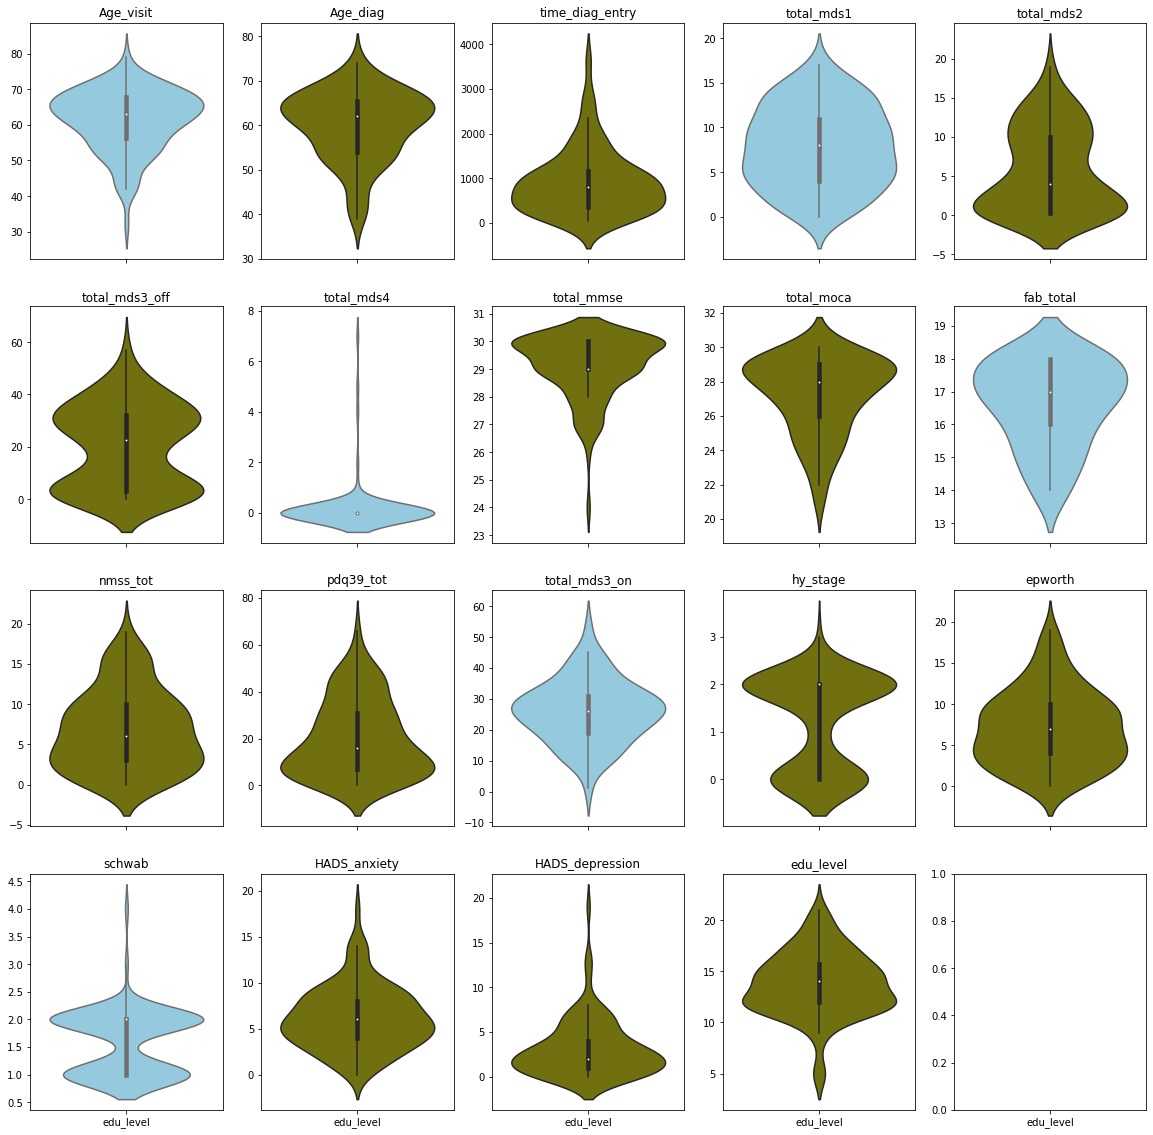

In [206]:
#violin plots of the numerical features
f, axes = plt.subplots(4,5,figsize=(20, 20), sharex=True)
sns.violinplot(data=confounder[[confounder_numercial[0]]],color="skyblue",ax=axes[0, 0]).set_title(confounder_numercial[0])
sns.violinplot(data=confounder[[confounder_numercial[1]]] , color="olive",ax=axes[0, 1]).set_title(confounder_numercial[1])
sns.violinplot(data=confounder[[confounder_numercial[2]]] , color="olive",ax=axes[0, 2]).set_title(confounder_numercial[2])
sns.violinplot(data=confounder[[confounder_numercial[3]]] , color="skyblue",ax=axes[0,3]).set_title(confounder_numercial[3])
sns.violinplot(data=confounder[[confounder_numercial[4]]] , color="olive",ax=axes[0,4]).set_title(confounder_numercial[4])
sns.violinplot(data=confounder[[confounder_numercial[5]]] , color="olive",ax=axes[1,0]).set_title(confounder_numercial[5])
sns.violinplot(data=confounder[[confounder_numercial[6]]] , color="skyblue",ax=axes[1,1]).set_title(confounder_numercial[6])
sns.violinplot(data=confounder[[confounder_numercial[7]]] , color="olive",ax=axes[1,2]).set_title(confounder_numercial[7])
sns.violinplot(data=confounder[[confounder_numercial[8]]] , color="olive",ax=axes[1,3]).set_title(confounder_numercial[8])
sns.violinplot(data=confounder[[confounder_numercial[9]]] , color="skyblue",ax=axes[1,4]).set_title(confounder_numercial[9])
sns.violinplot(data=confounder[[confounder_numercial[10]]] , color="olive",ax=axes[2,0]).set_title(confounder_numercial[10])
sns.violinplot(data=confounder[[confounder_numercial[11]]] , color="olive",ax=axes[2,1]).set_title(confounder_numercial[11])
sns.violinplot(data=confounder[[confounder_numercial[12]]],color="skyblue",ax=axes[2,2]).set_title(confounder_numercial[12])
sns.violinplot(data=confounder[[confounder_numercial[13]]],color="olive",ax=axes[2,3]).set_title(confounder_numercial[13])
sns.violinplot(data=confounder[[confounder_numercial[14]]],color="olive",ax=axes[2,4]).set_title(confounder_numercial[14])
sns.violinplot(data=confounder[[confounder_numercial[15]]],color="skyblue",ax=axes[3,0]).set_title(confounder_numercial[15])
sns.violinplot(data=confounder[[confounder_numercial[16]]],color="olive",ax=axes[3,1]).set_title(confounder_numercial[16])
sns.violinplot(data=confounder[[confounder_numercial[17]]],color="olive",ax=axes[3,2]).set_title(confounder_numercial[17])
sns.violinplot(data=confounder[[confounder_numercial[18]]],color="olive",ax=axes[3,3]).set_title(confounder_numercial[18])
#sns.violinplot(data=confounder[[confounder_numercial[19]]],color="olive",ax=axes[3,4]).set_title(confounder_numercial[19])

In [106]:
confounder["total_mds4"] #might be worth dropping
confounder["total_mmse"] # might be worth dropping
confounder["schwab"] #might be categorical, put it in the categorical feature set

AETID
AET0044    1.0
AET0380    1.0
AET0027    1.0
AET0049    2.0
AET0006    2.0
AET0065    2.0
AET0374    4.0
AET0002    2.0
AET0110    1.0
AET0372    2.0
AET0036    2.0
AET0004    2.0
AET0070    2.0
AET0031    2.0
AET0076    2.0
AET0078    2.0
AET0068    2.0
AET0056    2.0
AET0055    2.0
AET0404    2.0
AET0073    1.0
AET0075    1.0
AET0085    2.0
AET0041    1.0
AET0025    2.0
AET0099    1.0
AET0377    1.0
AET0045    2.0
AET0080    2.0
AET0097    1.0
AET0090    1.0
AET0001    1.0
AET0066    2.0
AET0062    1.0
AET0052    1.0
AET0087    2.0
AET0022    2.0
AET0121    2.0
AET0039    1.0
AET0415    2.0
AET0046    1.0
AET0048    1.0
AET0051    2.0
AET0034    2.0
AET0016    2.0
AET0077    2.0
AET0015    2.0
AET0032    2.0
AET0418    2.0
AET0104    1.0
AET0397    1.0
AET0137    1.0
AET0123    1.0
AET0081    2.0
AET0107    1.0
AET0373    2.0
AET0017    2.0
AET0114    1.0
AET0003    1.0
AET0014    2.0
AET0074    1.0
AET0387    1.0
AET0088    2.0
AET0115    1.0
AET0033    2.0
AET0420    3.0
AET0

In [111]:
# pearson correlation testing
corr = confounder[confounder_numercial].corr()
corr.style.background_gradient(cmap='coolwarm')

,Age_visit,Age_diag,time_diag_entry,total_mds1,total_mds2,total_mds3_off,total_mds4,total_mmse,total_moca,fab_total,nmss_tot,pdq39_tot,total_mds3_on,epworth,HADS_anxiety,HADS_depression,edu_level,coffee,alcohol
Age_visit,1.000000,0.966928,0.192882,0.244852,0.227368,0.181338,-0.016620,-0.000173,-0.019626,0.199657,0.257194,0.183907,0.098079,-0.096228,-0.028858,0.041850,0.085166,0.074602,0.188220
Age_diag,0.966928,1.000000,-0.057939,0.123258,0.132620,-0.045767,-0.131986,0.043913,-0.066693,0.412673,0.108485,0.113986,0.095220,-0.221180,-0.099543,-0.132333,0.097918,0.020227,0.158583
time_diag_entry,0.192882,-0.057939,1.000000,0.226593,0.295262,0.098723,0.250728,-0.207554,-0.195850,0.047499,0.354216,0.124093,0.034643,0.280012,0.017356,0.095010,-0.194528,-0.067313,-0.156233
total_mds1,0.244852,0.123258,0.226593,1.000000,0.664311,0.578139,0.162043,-0.026187,0.040570,0.168983,0.775858,0.667441,0.254950,0.292706,0.375883,0.489853,-0.082994,0.015988,0.179319
total_mds2,0.227368,0.132620,0.295262,0.664311,1.000000,0.801171,0.258575,-0.030064,0.068917,0.152457,0.720989,0.629672,0.495235,0.293039,0.096085,0.293081,0.118656,0.020364,0.202338
total_mds3_off,0.181338,-0.045767,0.098723,0.578139,0.801171,1.000000,0.287924,0.035629,0.131292,0.077498,0.563738,0.421774,0.899112,0.284673,0.021141,0.104634,0.098042,0.144207,0.240472
total_mds4,-0.016620,-0.131986,0.250728,0.162043,0.258575,0.287924,1.000000,0.045437,0.058518,-0.346066,0.125771,0.045356,0.249752,0.163192,-0.057190,0.034575,-0.107949,0.043075,-0.043502
total_mmse,-0.000173,0.043913,-0.207554,-0.026187,-0.030064,0.035629,0.045437,1.000000,0.526684,0.462745,-0.098480,-0.140766,0.133052,-0.090184,-0.193129,-0.238001,0.228483,0.004493,-0.023469
total_moca,-0.019626,-0.066693,-0.195850,0.040570,0.068917,0.131292,0.058518,0.526684,1.000000,0.589035,-0.001831,-0.050532,0.164928,-0.076747,-0.119919,-0.108027,0.227517,-0.038767,-0.142033
fab_total,0.199657,0.412673,0.047499,0.168983,0.152457,0.077498,-0.346066,0.462745,0.589035,1.000000,0.093890,0.151871,0.015366,-0.276648,0.154242,0.155714,0.197209,-0.253252,-0.348456


In [127]:
#what might be worth dropping or put together
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop_high = [column for column in upper.columns if any(upper[column] > 0.800000)]
print ("corr high",to_drop_high)
to_drop_low = [column for column in upper.columns if any(upper[column] < - 0.8)]
print("high low corr", to_drop_low)

corr high ['Age_diag', 'total_mds3_off', 'total_mds3_on']
high low corr []


### Strong correlation between the following variables:
- Age_visit - Age_diag 
- total_mds3_on - total_mds3_off

might be worth dropping later

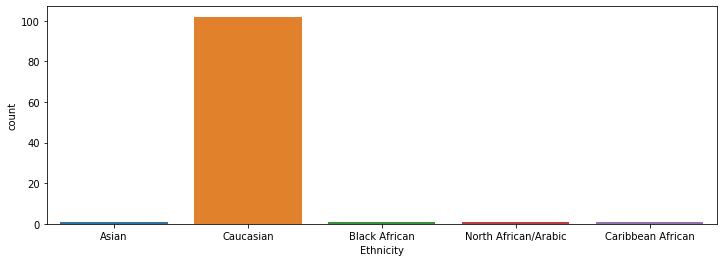

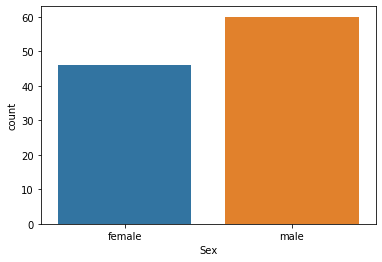

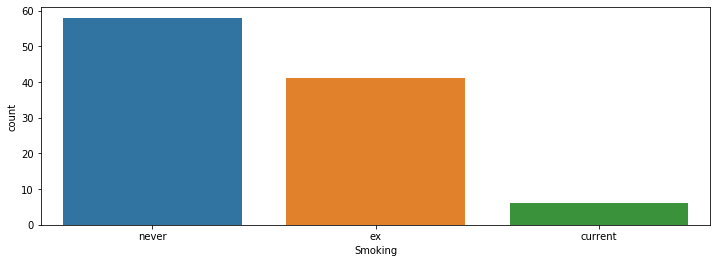

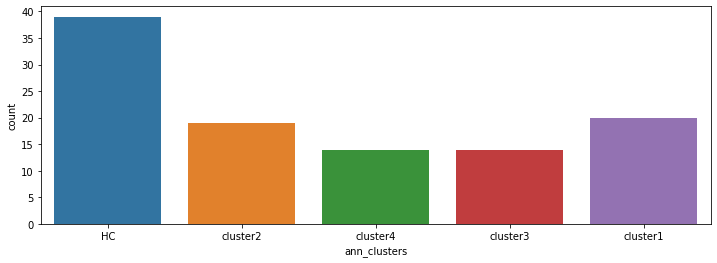

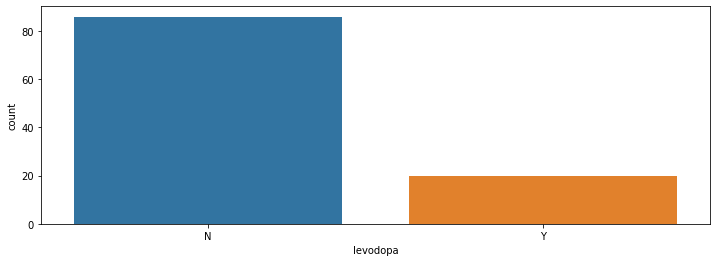

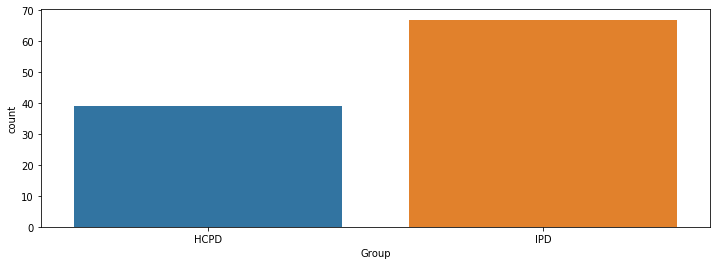

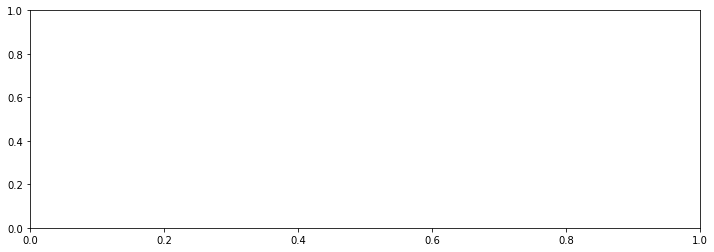

In [207]:
#distribution of categorical features
import matplotlib.pyplot as pl

for i in range(len(confounder_categorical)):
    fig,ax = plt.subplots(figsize=(12,4))
    plt.figure(i)
    sns.countplot(confounder[confounder_categorical[i]])

Schwab and Ethnicity have very little variation. Might be considered to drop later

In [ ]:
# imputation and first rough feature selection 

In [222]:
#which column reveal missing values:
categoricals_to_impute=[]
numericals_to_impute=[]
for column_ in confounder.columns.tolist():
    if confounder[column_].isnull().sum(axis = 0) >0:
        print (column_)
        print ("Nr of missing values:",confounder[column_].isnull().sum(axis = 0))
        print ("Percentage", (int((confounder[column_].isnull().sum(axis = 0)))/106)*100)
        if column_ in confounder_categorical:
            categoricals_to_impute.append(column_)
        else:
            numericals_to_impute.append(column_)

Smoking
Nr of missing values: 1
Percentage 0.9433962264150944
Age_diag
Nr of missing values: 39
Percentage 36.79245283018868
time_diag_entry
Nr of missing values: 39
Percentage 36.79245283018868
total_mds3_off
Nr of missing values: 12
Percentage 11.320754716981133
total_mds4
Nr of missing values: 3
Percentage 2.8301886792452833
total_mmse
Nr of missing values: 1
Percentage 0.9433962264150944
total_moca
Nr of missing values: 1
Percentage 0.9433962264150944
fab_total
Nr of missing values: 70
Percentage 66.0377358490566
nmss_tot
Nr of missing values: 2
Percentage 1.8867924528301887
pdq39_tot
Nr of missing values: 4
Percentage 3.7735849056603774
total_mds3_on
Nr of missing values: 43
Percentage 40.56603773584906
hy_stage
Nr of missing values: 1
Percentage 0.9433962264150944
epworth
Nr of missing values: 2
Percentage 1.8867924528301887
HADS_anxiety
Nr of missing values: 1
Percentage 0.9433962264150944
HADS_depression
Nr of missing values: 1
Percentage 0.9433962264150944
edu_level
Nr of miss

In [223]:
print(categoricals_to_impute)
print (numericals_to_impute)

['Smoking']
['Age_diag', 'time_diag_entry', 'total_mds3_off', 'total_mds4', 'total_mmse', 'total_moca', 'fab_total', 'nmss_tot', 'pdq39_tot', 'total_mds3_on', 'hy_stage', 'epworth', 'HADS_anxiety', 'HADS_depression', 'edu_level', 'coffee', 'alcohol']


In [224]:
# drop age diagnosis,time_diag_entry and fab total cause of correlation and too much missing values and redundancy
# impute rest using most frequent for categorical and iterative imputer for numerical
confounder_firstdrop=confounder.drop(columns=['Age_diag','time_diag_entry','fab_total'])

In [225]:
numericals_to_impute.remove("Age_diag")
numericals_to_impute.remove("time_diag_entry")
numericals_to_impute.remove("fab_total")

In [226]:
confounder_firstdrop

,Sex,Age_visit,Ethnicity,Smoking,Group,ann_clusters,total_mds1,total_mds2,total_mds3_off,total_mds4,total_mmse,levodopa,total_moca,nmss_tot,pdq39_tot,total_mds3_on,hy_stage,epworth,schwab,HADS_anxiety,HADS_depression,edu_level,coffee,alcohol
AETID,,,,,,,,,,,,,,,,,,,,,,,,
AET0044,female,62,Asian,never,HCPD,HC,5.0,0.0,3.0,0.0,27.0,N,26.0,4.0,6.0,NaN,0.0,2.0,1.0,9.0,3.0,14.0,3.0,2.0
AET0380,male,69,Caucasian,ex,HCPD,HC,1.0,0.0,1.0,0.0,30.0,Y,29.0,2.0,1.0,NaN,0.0,9.0,1.0,2.0,0.0,17.0,3.0,1.0
AET0027,female,43,Caucasian,never,HCPD,HC,9.0,2.0,0.0,0.0,30.0,N,27.0,10.0,31.0,NaN,0.0,5.0,1.0,9.0,0.0,12.0,2.0,1.0
AET0049,female,70,Caucasian,never,IPD,cluster2,4.0,7.0,28.0,0.0,28.0,N,28.0,5.0,28.0,24.0,2.0,1.0,2.0,6.0,3.0,17.0,3.0,2.0
AET0006,male,69,Caucasian,ex,IPD,cluster4,9.0,9.0,20.0,0.0,30.0,Y,25.0,10.0,24.0,18.0,2.0,1.0,2.0,4.0,1.0,12.0,3.0,2.0
AET0065,female,66,Caucasian,never,IPD,cluster3,10.0,9.0,34.0,0.0,30.0,N,29.0,10.0,NaN,25.0,2.0,13.0,2.0,6.0,2.0,12.0,3.0,2.0
AET0374,male,72,Caucasian,ex,IPD,cluster2,6.0,13.0,NaN,0.0,27.0,Y,24.0,7.0,44.0,42.0,2.0,6.0,4.0,4.0,3.0,15.0,3.0,2.0
AET0002,male,67,Caucasian,never,IPD,cluster1,13.0,12.0,27.0,0.0,29.0,Y,29.0,17.0,55.0,19.0,2.0,3.0,2.0,10.0,7.0,18.0,1.0,2.0
AET0110,female,63,Caucasian,ex,HCPD,HC,9.0,0.0,10.0,0.0,30.0,N,27.0,4.0,10.0,NaN,0.0,2.0,1.0,4.0,0.0,14.0,2.0,2.0


In [227]:
#imputing missing CATEGORICAL values
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
confounder_firstdrop[categoricals_to_impute]=imp.fit_transform(confounder_firstdrop[categoricals_to_impute])

In [228]:
#now encode categorical values: sex, ethnicity, smoking, group, ann clusters, levodopa
for cat in confounder_categorical:
    bins = pd.get_dummies(confounder_firstdrop[cat], prefix=cat)
    confounder_firstdrop = confounder_firstdrop.drop(cat,axis = 1)
    # Join the encoded df
    confounder_firstdrop = confounder_firstdrop.join(bins)

In [233]:
confounder_firstdrop_encoded=confounder_firstdrop

In [235]:
confounder_firstdrop_encoded

,Age_visit,total_mds1,total_mds2,total_mds3_off,total_mds4,total_mmse,total_moca,nmss_tot,pdq39_tot,total_mds3_on,hy_stage,epworth,schwab,HADS_anxiety,HADS_depression,edu_level,coffee,alcohol,Sex_female,Sex_male,Ethnicity_Asian,Ethnicity_Black African,Ethnicity_Caribbean African,Ethnicity_Caucasian,Ethnicity_North African/Arabic,Smoking_current,Smoking_ex,Smoking_never,ann_clusters_HC,ann_clusters_cluster1,ann_clusters_cluster2,ann_clusters_cluster3,ann_clusters_cluster4,levodopa_N,levodopa_Y,Group_HCPD,Group_IPD
AETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AET0044,62,5.0,0.0,3.0,0.0,27.0,26.0,4.0,6.0,NaN,0.0,2.0,1.0,9.0,3.0,14.0,3.0,2.0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
AET0380,69,1.0,0.0,1.0,0.0,30.0,29.0,2.0,1.0,NaN,0.0,9.0,1.0,2.0,0.0,17.0,3.0,1.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0
AET0027,43,9.0,2.0,0.0,0.0,30.0,27.0,10.0,31.0,NaN,0.0,5.0,1.0,9.0,0.0,12.0,2.0,1.0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0
AET0049,70,4.0,7.0,28.0,0.0,28.0,28.0,5.0,28.0,24.0,2.0,1.0,2.0,6.0,3.0,17.0,3.0,2.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
AET0006,69,9.0,9.0,20.0,0.0,30.0,25.0,10.0,24.0,18.0,2.0,1.0,2.0,4.0,1.0,12.0,3.0,2.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1
AET0065,66,10.0,9.0,34.0,0.0,30.0,29.0,10.0,NaN,25.0,2.0,13.0,2.0,6.0,2.0,12.0,3.0,2.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
AET0374,72,6.0,13.0,NaN,0.0,27.0,24.0,7.0,44.0,42.0,2.0,6.0,4.0,4.0,3.0,15.0,3.0,2.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
AET0002,67,13.0,12.0,27.0,0.0,29.0,29.0,17.0,55.0,19.0,2.0,3.0,2.0,10.0,7.0,18.0,1.0,2.0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1
AET0110,63,9.0,0.0,10.0,0.0,30.0,27.0,4.0,10.0,NaN,0.0,2.0,1.0,4.0,0.0,14.0,2.0,2.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0


In [ ]:
##now impute numericals using scikit learn knn imputer!